Kütüphaneler

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow.compat.v1 as tf
from keras.utils import plot_model
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns

veri toplama

In [2]:
df = pd.read_csv('waterQuality1.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


In [3]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [4]:
df = df[~df['ammonia'].str.contains('#NUM!')]
df = df[~df['is_safe'].str.contains('#NUM!')]

# 'ammonia' sütununu sayısal tipe dönüştür
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')

# 'is_safe' sütununu sayısal tipe dönüştür (örneğin, 1 ve 0 olarak)
df['is_safe'] = df['is_safe'].astype(int)

eğitim ve test verilerini ayırma

In [5]:
x = df.drop("is_safe",axis=1)
y = df['is_safe']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [6]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 20)
(6396, 20)
(6396,)
(1600,)


ölçeklendirme

In [7]:
scaler = MinMaxScaler()

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

dense net modelinin oluşturulması

In [8]:
# Compat.v1'i etkinleştirme
tf.disable_v2_behavior()

classifier = Sequential()

# ilk gizli katman
classifier.add(Dense(units=64,activation='relu', input_dim = 20))
classifier.add(Dropout(0.5))

# ikinci gizli katman
classifier.add(Dense(units=32,activation='relu'))   

# çıktı katmanı
classifier.add(Dense(units=1,activation='sigmoid'))

# Modeli derleme
optimizer = tf.compat.v1.train.AdamOptimizer()  # tf.compat.v1.train.Optimizer'ı kullan

classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
non-resource variables are not supported in the long term




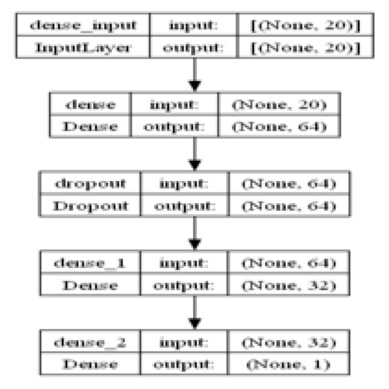

In [9]:
# Modelin görsel özetini al
plot_model(classifier, to_file='model_plot_densenet_layer.png', show_shapes=True, show_layer_names=True)

# Görsel özet resmini aç
img = Image.open('model_plot_densenet_layer.png')

# Yeni boyutları belirle
new_width = 200
new_height = 200

# Resmi yeniden boyutlandır
img_resized = img.resize((new_width, new_height))

# Yeniden boyutlandırılmış resmi kaydet
img_resized.save('model_plot_densenet_layer_resized.png')

# Görsel özeti görüntüleme
plt.imshow(img_resized)
plt.axis('off')
plt.show()

In [10]:
print(x_train.shape)
print(x_test.shape)

(6396, 20)
(1600, 20)


In [11]:
# Eğitim süreci
classifier.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))



Train on 6396 samples, validate on 1600 samples
Epoch 1/20
6396/6396 [==============================] - 1s 142us/sample - loss: 0.3461 - acc: 0.8863 - val_loss: 0.3012 - val_acc: 0.8756
Epoch 2/20
 768/6396 [==>...........................] - ETA: 0s - loss: 0.2744 - acc: 0.8906

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6396/6396 [==============================] - 1s 106us/sample - loss: 0.2721 - acc: 0.8923 - val_loss: 0.2738 - val_acc: 0.8900
Epoch 3/20
6396/6396 [==============================] - 1s 82us/sample - loss: 0.2559 - acc: 0.8993 - val_loss: 0.2611 - val_acc: 0.8969
Epoch 4/20
6396/6396 [==============================] - 1s 83us/sample - loss: 0.2454 - acc: 0.9054 - val_loss: 0.2515 - val_acc: 0.9069
Epoch 5/20
6396/6396 [==============================] - 0s 72us/sample - loss: 0.2387 - acc: 0.9093 - val_loss: 0.2451 - val_acc: 0.9025
Epoch 6/20
6396/6396 [==============================] - 1s 119us/sample - loss: 0.2334 - acc: 0.9112 - val_loss: 0.2387 - val_acc: 0.9038
Epoch 7/20
6396/6396 [==============================] - 1s 91us/sample - loss: 0.2252 - acc: 0.9142 - val_loss: 0.2233 - val_acc: 0.9106
Epoch 8/20
6396/6396 [==============================] - 1s 134us/sample - loss: 0.2168 - acc: 0.9157 - val_loss: 0.2180 - val_acc: 0.9137
Epoch 9/20
6396/6396 [===========================

In [12]:
# Test veri seti üzerinde tahminler oluştur
y_pred_densenet = classifier.predict(x_test)

# # Tahmin sonuçlarını eşik değere göre (örneğin, 0.5) sınıflara dönüştür
y_pred_classes = (y_pred_densenet > 0.5).astype(int)

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [13]:
# Doğruluk (Accuracy) hesapla
accuracy_dense_net = accuracy_score(y_test, y_pred_classes)
print("Accuracy: {:.2f}%".format(accuracy_dense_net* 100))


# Confusion matrix hesapla
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Sınıflandırma raporu (classification report) tablosunu oluştur
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)

# Sınıflandırma raporu (classification report) tablosunu oluştur (sözlük olarak)
class_report_dict = classification_report(y_test, y_pred_classes, output_dict=True)


Accuracy: 93.56%
Confusion Matrix:
[[1393    7]
 [  96  104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1400
           1       0.94      0.52      0.67       200

    accuracy                           0.94      1600
   macro avg       0.94      0.76      0.82      1600
weighted avg       0.94      0.94      0.93      1600



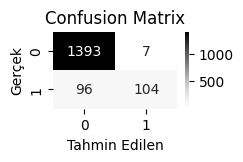

In [14]:
# Confusion Matrix
cm_ysa = confusion_matrix(y_test, y_pred_classes)

# Heatmap oluşturma
plt.figure(figsize=(2, 1))  # Genişlik: 6 inç, Yükseklik: 4 inç
sns.heatmap(cm_ysa, annot=True, fmt="d", cmap="Greys", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')

# PNG olarak kaydetme
plt.savefig('confusion_matrix_densenet.png', bbox_inches='tight')  # bbox_inches='tight' ile gereksiz beyaz alanları kaldırır
plt.show()

svm

In [15]:
# Veriyi eğitim ve test setlerine ayırma
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Veriyi standartlaştırma
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(X_test)

# SVM modelini oluşturma
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# SVM modelini eğitme
svm_model.fit(x_train, y_train)

# Test setini kullanarak tahmin yapma
y_pred_svm_before = svm_model.predict(X_test)

# Model performansını değerlendirme
accuracy_svm = accuracy_score(y_test, y_pred_svm_before)
print("SVM Modeli Doğruluğu: {:.2%}".format(accuracy_svm))  # Yüzde olarak yazdırma

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_before)
print("Confusion Matrix:\n", cm_svm)

# Classification Report
report_svm = classification_report(y_test,y_pred_svm_before)
print("Classification Report:\n", report_svm)


SVM Modeli Doğruluğu: 93.69%
Confusion Matrix:
 [[1392    8]
 [  93  107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1400
           1       0.93      0.54      0.68       200

    accuracy                           0.94      1600
   macro avg       0.93      0.76      0.82      1600
weighted avg       0.94      0.94      0.93      1600



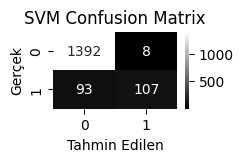

In [16]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_before)

# Heatmap oluşturma
plt.figure(figsize=(2, 1))  # Genişlik: 6 inç, Yükseklik: 4 inç
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="gray", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('SVM Confusion Matrix')

# PNG olarak kaydetme
plt.savefig('confusion_matrix_svm.png', bbox_inches='tight', dpi=300)  # bbox_inches='tight' ile gereksiz beyaz alanları kaldırır
plt.show()

knn

In [17]:
# Veriyi eğitim ve test setlerine ayırma
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Veriyi standartlaştırma (KNN genellikle ölçeklendirmeye duyarlıdır)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(X_test)

# KNN modelini oluşturma
knn_model = KNeighborsClassifier(n_neighbors=10)

# Modeli eğitme
knn_model.fit(x_train_scaled, y_train)

# Test seti üzerinde tahmin yapma
y_pred_knn = knn_model.predict(X_test_scaled)

# Model performansını değerlendirme
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

# Sonuçları yazdırma
print("KNN Modeli Doğruluğu: {:.2%}".format(accuracy_knn))
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Cross-validation ile model performansını daha güvenilir bir şekilde değerlendirme
cv_results = cross_val_score(knn_model, x_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Sonuçları:", cv_results)
print("Ortalama Doğruluk:", cv_results.mean())

KNN Modeli Doğruluğu: 90.19%
Confusion Matrix:
[[1393    7]
 [ 150   50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1400
           1       0.88      0.25      0.39       200

    accuracy                           0.90      1600
   macro avg       0.89      0.62      0.67      1600
weighted avg       0.90      0.90      0.88      1600

Cross-Validation Sonuçları: [0.9109375  0.91477717 0.90774042 0.91399531 0.91399531]
Ortalama Doğruluk: 0.9122891419077404


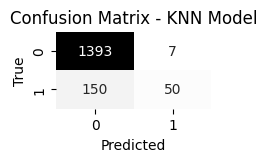

In [18]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Heatmap oluşturma
plt.figure(figsize=(2, 1))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greys', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - KNN Model')
plt.xlabel('Predicted')
plt.ylabel('True')

# PNG olarak kaydetme
plt.savefig('confusion_matrix_knn.png')
plt.show()

karşılaştırma

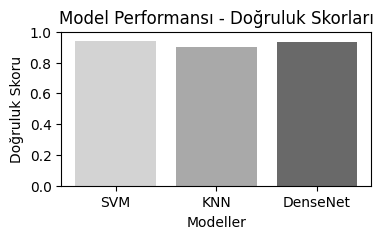

In [19]:
# Model isimleri
model_isimleri = ['SVM', 'KNN', 'DenseNet']

# Model doğruluk skorları
accuracy_scores = [accuracy_svm, accuracy_knn, accuracy_dense_net]

# Gri tonları renk paleti
gray_palette = ['lightgray', 'darkgray', 'dimgray']

# Çubuk grafik oluşturma
plt.figure(figsize=(4, 2))
plt.bar(model_isimleri, accuracy_scores, color=gray_palette)
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırla
plt.title('Model Performansı - Doğruluk Skorları')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk Skoru')

# PNG olarak kaydetme
plt.savefig('model_performance.png')
plt.show()